In [2]:
import sys
import os
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
#import pi as pn
#from plotnine import ggplot, aes, geom_point,geom_text,scale_y_continuous,theme
import seaborn as se

In [3]:
df =  pd.read_csv('C:\\Users\Cristiane\Documents\\UFMG\Arquivos_Dissertacao\Projeto\data\\final_novo.csv', sep=';',decimal='.')

In [4]:
#df = pd.read_csv(os.path.join('final.csv'), sep=';', decimal=',')

In [5]:
#0=Ausente; 1=Sente que a vida está vazia; 2=Desejos de morte; 3=Pensamentos suicidas ativos; 4=Tentativa grave de suicídio; -9 = Não respondida
df['Suicidio'].unique()

array([ 2.,  1.,  0.,  3.,  4., nan])

In [6]:
df['Anos educacao formal'].unique()

array([12., 18., 14., 10., 22., 17., 16., 15., 11., 21., 19.,  9., 13.,
        2.,  8.,  7.,  3., 20., 23.,  6., -5., 25., nan,  0.,  5.,  4.,
       26., 27., 24.,  1.])

In [7]:
na=df.loc[df['Suicidio'].isna()].copy()
na

,Chave,sexo,Estado_civil,Status_empl,Licenca,Tipo_Resid,Residencia,Alcoolatra,Droga,Suic_familia,...,Eixo I: Panico sem agorafobia,Eixo I: Fobia especifica,Eixo I: Fobia social,Eixo I: Obsessivo-compulsivo,Eixo I: Estresse pos-traumatico,Eixo I: Ansiedade generalizada,Eixo II: Personalidade paranoica,Eixo II: Transtorno de personalidade,TOC,idade
1742,NDAR_INVYP716TGB,NaN,1.0,NaN,1.0,4.0,3.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2133,NDAR_INVWV319EHT,NaN,1.0,NaN,0.0,2.0,3.0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,5.0,NaN


In [8]:
#0=Ausente; 1=Sente que a vida está vazia; 2=Desejos de morte; 3=Pensamentos suicidas ativos; 4=Tentativa grave de suicídio; -9 = Não respondida
#todo
'''df['Target_Suicidio']=np.where((df['Suicidio'] >1),1,0)
df['Target_Suicidio']=df['Target_Suicidio'].astype(float)
df['Target_Suicidio'].value_counts()'''

"df['Target_Suicidio']=np.where((df['Suicidio'] >1),1,0)\ndf['Target_Suicidio']=df['Target_Suicidio'].astype(float)\ndf['Target_Suicidio'].value_counts()"

In [9]:
df['Target_Suicidio']=df['Suicidio'].astype(float)

In [10]:
df['Target_TOC']=np.where(df['TOC'] >1,1,0)
df['Target_TOC']=df['Target_TOC'].astype(float)
df['Target_TOC'].value_counts()

0.0    2605
1.0    1348
Name: Target_TOC, dtype: int64

In [11]:
#0=Ausente, 1=Duvidoso ,2=Leve , 3=Moderada, 4=Grave
df['Target_Ansiedade']=np.where((df['Ansiedade'] ==3)|(df['Ansiedade'] ==4)|(df['Ansiedade somática'] ==3)|(df['Ansiedade somática'] ==4),1,0)
df['Target_Ansiedade']=df['Target_Ansiedade'].astype(float)
df['Target_Ansiedade'].value_counts()

0.0    2284
1.0    1669
Name: Target_Ansiedade, dtype: int64

In [12]:
#0=Ausente; 1=Leve; 2=Grave: Reclama da dificuldade noturna de dormir; -9 = Não respondida
df['Target_Insonia']=np.where(df['Insonia'] >1,1,0)
df['Target_Insonia']=df['Target_Insonia'].astype(float)
df['Target_Insonia'].value_counts()

1.0    2293
0.0    1660
Name: Target_Insonia, dtype: int64

In [13]:
#0=Ausente; 1=Leve; 2=Moderado; 3=Moderadamente grave; 4=Grave; -9 = Não respondida
df['Target_Hipocondriase']=np.where(df['Hipocondriase'] >1,1,0)
df['Target_Hipocondriase']=df['Target_Hipocondriase'].astype(float)
df['Target_Hipocondriase'].value_counts()

0.0    2654
1.0    1299
Name: Target_Hipocondriase, dtype: int64

In [14]:
# Unindo informações de drogas/Alcool devido volume de informações positivas 
df['Target_Drogas']=np.where((df['Droga'] ==1)|(df['Alcoolatra'] ==1),1,0)
df['Target_Drogas']=df['Target_Drogas'].astype(float)
df['Target_Drogas'].value_counts()

0.0    3795
1.0     158
Name: Target_Drogas, dtype: int64

In [15]:
# executa a função que gera o relatório
##rofile = ProfileReport(df, title="Depressão")

In [16]:
# visualização do relatório
#profile.to_file("report_depressao.html")

In [17]:
df['sexo'] = np.where((df['sexo']=='F'),'1', df['sexo'])
df['sexo'] = np.where(df['sexo']=='M','2', df['sexo'])
df['sexo']=df['sexo'].astype(float)



In [18]:
df = df[[ 'Chave','Alcoolatra', 'Droga', 'Suic_familia', 'Dep_familia',
              'Alc_familia', 'Drog_familia', 'Neuro', 'psiquiatrica',
              'Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos', 'Capaz de tomar decisões importantes',
              'Estudante', 'Insonia', 'Ansiedade', 'Perda de insights', 'Apetite', 'Perda de peso',
              'Ansiedade somática', 'Hipocondriase', 'Sentimentos_culpa', 'Suicidio', 'Trabalho e interesses',
              'Energia', 'Lentidao pensamento e fala', 'Agitação', 'Libido', 'TOC','Pontuação total','idade',
              'Deprimido', 'sexo', 'Estado_civil', 'Tipo_Resid','Anos educacao formal','Target_Suicidio',
          'coracao', 'vascular',  'Renal', 'Genito_urinario', 'Musculoesqueletico',  'Respiratorio', 'Figado', 'Endocrino_metabolico','Numero total de pessoas em casa']] #todo depois

In [19]:
df_corr = df[[ 'Alcoolatra', 'Droga', 'Suic_familia', 'Dep_familia',
              'Alc_familia', 'Drog_familia', 'Neuro', 'psiquiatrica',
              'Capaz de desfrutar das coisas', 'Impacto de sua familia e amigos', 'Capaz de tomar decisões importantes',
              'Estudante', 'Insonia', 'Ansiedade', 'Perda de insights', 'Apetite', 'Perda de peso',
              'Ansiedade somática', 'Hipocondriase', 'Sentimentos_culpa', 'Suicidio', 'Trabalho e interesses',
              'Energia', 'Lentidao pensamento e fala', 'Agitação', 'Libido', 'TOC','Pontuação total','idade',
              'Deprimido', 'sexo', 'Estado_civil', 'Tipo_Resid','Anos educacao formal','Target_Suicidio',
               'coracao', 'vascular',  'Renal', 'Genito_urinario', 'Musculoesqueletico',  'Respiratorio', 'Figado', 'Endocrino_metabolico','Numero total de pessoas em casa']].copy()

## Análise target suicídio

In [20]:
# 20 features mais relevantes
df_corr = df_corr.corr().unstack().sort_values(ascending=False) 
df_corr = pd.DataFrame(df_corr).reset_index() 
df_corr.columns = ['Coluna1', 'Coluna2', 'correlation'] 
df_corr.query("Coluna1 == 'Target_Suicidio' & Coluna2 != 'Target_Suicidio'").head(20)

,Coluna1,Coluna2,correlation
34,Target_Suicidio,Suicidio,1.000000
85,Target_Suicidio,Pontuação total,0.362358
122,Target_Suicidio,Deprimido,0.216695
128,Target_Suicidio,Sentimentos_culpa,0.207881
138,Target_Suicidio,Trabalho e interesses,0.191439
297,Target_Suicidio,Ansiedade,0.098229
328,Target_Suicidio,Ansiedade somática,0.094207
340,Target_Suicidio,Impacto de sua familia e amigos,0.093614
422,Target_Suicidio,Lentidao pensamento e fala,0.075376
439,Target_Suicidio,Libido,0.071961


In [21]:
df_corr.query("Coluna1 == 'Target_Suicidio' & Coluna2 != 'Target_Suicidio'")

,Coluna1,Coluna2,correlation
34,Target_Suicidio,Suicidio,1.000000
85,Target_Suicidio,Pontuação total,0.362358
122,Target_Suicidio,Deprimido,0.216695
128,Target_Suicidio,Sentimentos_culpa,0.207881
138,Target_Suicidio,Trabalho e interesses,0.191439
297,Target_Suicidio,Ansiedade,0.098229
328,Target_Suicidio,Ansiedade somática,0.094207
340,Target_Suicidio,Impacto de sua familia e amigos,0.093614
422,Target_Suicidio,Lentidao pensamento e fala,0.075376
439,Target_Suicidio,Libido,0.071961


## Sentimentos_culpa
0=Ausente; 1=Duvidoso ou trivial: Auto-censura, sente que decepcionou as pessoas; 2=Leve:Ideias de culpa ou ruminação sobre erros passados ou semntimentos pecaminosos; 3=Moderada: A doença atual é uma punição. Ilusões de culpa; 4=Grave: Ouve vozes acusatórias ou denunciatórias e/ou experiências que ameaçam alucinações visuais; -9 = Não respondida

In [22]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Sentimentos_culpa').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Sentimentos_culpa', 'Target_Suicidio', 'Chave']
print(df_plot)
'''p = (
    pn.ggplot(df_plot, pn.aes(x='Sentimentos_culpa', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.02) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)'''

Suicidio médio: 90.3%
   Sentimentos_culpa  Target_Suicidio  Chave
0                0.0         0.582583    333
1                1.0         0.708861    632
2                2.0         0.865447   1531
3                3.0         1.088090   1419
4                4.0         1.583333     36


'p = (\n    pn.ggplot(df_plot, pn.aes(x=\'Sentimentos_culpa\', y=\'Target_Suicidio\')) +\n    pn.geom_point(pn.aes(size=\'Chave\')) +\n    pn.geom_text(pn.aes(label=\'Chave\'), nudge_y=0.02) +\n    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +\n    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))\n    )\nprint(p)'

In [23]:
df_plot = df.groupby('Sentimentos_culpa').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Sentimentos_culpa', 'Target_Suicidio', 'Chave']
df_plot.plot('Capaz de tomar decisões importantes','Target_Suicidio')

KeyError: 'Capaz de tomar decisões importantes'

In [ ]:
df_plot = df.groupby('Dep_familia').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Dep_familia', 'Target_Suicidio', 'Chave']
df_plot.plot('Dep_familia','Target_Suicidio')

In [ ]:
df_plot = df.groupby('Alc_familia').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Alc_familia', 'Target_Suicidio', 'Chave']
df_plot.plot('Alc_familia','Target_Suicidio')

In [ ]:
df_plot = df.groupby('Droga').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Droga', 'Target_Suicidio', 'Chave']
df_plot.plot('Droga','Target_Suicidio')

In [ ]:
df_plot = df.groupby('Capaz de tomar decisões importantes').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Capaz de tomar decisões importantes', 'Target_Suicidio', 'Chave']
df_plot.plot('Capaz de tomar decisões importantes','Target_Suicidio')

In [ ]:
df['Impacto de sua familia e amigos']

In [ ]:
df_plot = df.groupby('Estudante').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Estudante', 'Target_Suicidio', 'Chave']
df_plot.plot('Estudante','Target_Suicidio')

In [ ]:
df_plot = df.groupby('Hipocondriase').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Hipocondriase', 'Target_Suicidio', 'Chave']
df_plot.plot('Hipocondriase','Target_Suicidio')

In [ ]:
df_plot = df.groupby('Trabalho e interesses').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Trabalho e interesses', 'Target_Suicidio', 'Chave']
df_plot.plot('Trabalho e interesses','Target_Suicidio')

In [ ]:
df_plot = df.groupby('Capaz de desfrutar das coisas').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Capaz de desfrutar das coisas', 'Target_Suicidio', 'Chave']
df_plot.plot('Capaz de desfrutar das coisas','Target_Suicidio')

## Humor deprimido
0=Ausente; 1= Duvidoso ou trivial; 2=Leve-Sente-se triste, sem esperança, indefeso, inútil não mais do que 2 dias; 3=Moderado; 4=Grave:

In [ ]:
df['Estudante'].value_counts()

In [ ]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Deprimido').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Deprimido', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    ggplot(df_plot, aes(x='Deprimido', y='Target_Suicidio')) +
    geom_point(aes(size='Chave')) +
    geom_text(aes(label='Chave'), nudge_y=0.02) +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    theme()
    )
print(p)

In [ ]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Capaz de tomar decisões importantes').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Capaz de tomar decisões importantes', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    ggplot(df_plot, aes(x='Capaz de tomar decisões importantes', y='Target_Suicidio')) +
    geom_point(aes(size='Chave')) +
    geom_text(aes(label='Chave'), nudge_y=0.02) +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    theme()
    )
print(p)

In [ ]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Estudante').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Estudante', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    ggplot(df_plot, aes(x='Estudante', y='Target_Suicidio')) +
    geom_point(aes(size='Chave')) +
    geom_text(aes(label='Chave'), nudge_y=0.02) +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    theme()
    )
print(p)

### Escala Hamilton de classificação para depressão-clínico - Pontuação total 
Score com mais de 25 pontos caracterizam pacientes gravemente deprimidos, score entre 18 a 24 pontos caracterizam pacientes moderadamente deprimidos e escores entre 7 e 17 pontos caracterizam pacientes com depressão leve

In [ ]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Pontuação total').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Pontuação total', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    ggplot(df_plot, aes(x='Pontuação total', y='Target_Suicidio')) +
    geom_point(aes(size='Chave')) +
    geom_text(aes(label='Chave'), nudge_y=0.02) +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    theme()
    )
print(p)

## Trabalho e interesses
0=Ausente: Sem dificuldade; 1=Duvidoso ou trivial: Pensamentos e sentimentos de incapacidade, fadiga ou fraqueza relacionados às atividades; trabalho ou hobbies; 2=Leve: Perda de interesse na atividade; hobbies ou trabalho — seja diretamente relatado pelo paciente, ou indireto em indiferença, indecisão e vacilação; 3=Moderado: Diminuição do tempo real gasto nas atividades ou diminuição da produtividade; 4=Grave:

In [ ]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Trabalho e interesses').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Trabalho e interesses', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    ggplot(df_plot, aes(x='Trabalho e interesses', y='Target_Suicidio')) +
    geom_point(aes(size='Chave')) +
    geom_text(aes(label='Chave'), nudge_y=0.02) +
    scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    theme()
    )
print(p)

In [ ]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('Ansiedade somática').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Ansiedade somática', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Ansiedade somática', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.009) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

In [ ]:
# Pensamento suicída não varia muito entre as faixas de idade de 20 à 40 anos
df_analalise=df[['Target_Suicidio', 'idade', 'Suicidio']].groupby(['Target_Suicidio','idade']).count().reset_index()
se.barplot(data=df_analalise,x='idade',y='Suicidio',hue='Target_Suicidio')

## Feminino = 1 Masculino = 2

In [ ]:
# Pensamentos suicídias são mais frequentes no sexo masculino
df_analalise=df[['Target_Suicidio','sexo', 'Suicidio']].groupby(['Target_Suicidio','sexo']).count().reset_index()
se.barplot(data=df_analalise,x='sexo',y='Suicidio',hue='Target_Suicidio')

In [ ]:
print('Suicidio médio: {:.1%}'.format(df['Target_Suicidio'].mean()))
df_plot = df.groupby('sexo').agg({'Target_Suicidio': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['sexo', 'Target_Suicidio', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='sexo', y='Target_Suicidio')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.003) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

In [ ]:
df.info()

In [24]:
df_caracteristica = df[['sexo', 'Estado_civil', 'Tipo_Resid', 'idade','Anos educacao formal','Estudante',  'Trabalho e interesses', 'Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes','Suicidio','Chave']]
#df_caracteristica = df_caracteristica[[ 'Tipo_Resid', 'idade','Anos educacao formal','Estudante',  'Trabalho e interesses', 'Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes','Suicidio','Chave']]

In [25]:
'''df_caracteristica = df[['sexo', 'Estado_civil', 'Status_empl','Licenca','Tipo_Resid', 'Residencia', 'idade','Anos educacao formal','Estudante','Renda mensal', 'Recebe assistencia publica',
                        'Receber dinheiro do emprego', 'Trabalho e interesses', 'Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes','Suicidio','Chave']]'''

"df_caracteristica = df[['sexo', 'Estado_civil', 'Status_empl','Licenca','Tipo_Resid', 'Residencia', 'idade','Anos educacao formal','Estudante','Renda mensal', 'Recebe assistencia publica',\n                        'Receber dinheiro do emprego', 'Trabalho e interesses', 'Capaz de desfrutar das coisas', 'Capaz de tomar decisões importantes','Suicidio','Chave']]"

In [26]:
df_caracteristica.sexo 

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3948    2.0
3949    1.0
3950    1.0
3951    2.0
3952    1.0
Name: sexo, Length: 3953, dtype: float64

In [27]:
# Divisão dos dados por assunto


df_fam = df[['Impacto de sua familia e amigos', 'Suic_familia', 'Dep_familia','Alc_familia','Drog_familia','Numero total de pessoas em casa',
           'Suicidio','Chave']]  

df_fisc=df[['coracao', 'vascular',  'Renal', 'Genito_urinario', 'Musculoesqueletico', 'Neuro', 'psiquiatrica', 'Respiratorio', 'Figado', 'Endocrino_metabolico','Suicidio','Chave']]

In [28]:

df_emoc= df[['Alcoolatra', 'Droga', 'Insonia', 'Deprimido', 'Ansiedade','Perda de insights', 'Apetite', 'Perda de peso', 'Ansiedade somática', 'Hipocondriase', 'Sentimentos_culpa', 'Energia', 
             'Lentidao pensamento e fala', 'Pontuação total', 'Agitação', 'Libido','Suicidio','Chave']]

In [29]:
'''fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 13))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Variáveis físicas", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(df_fisc.columns.values[:-2], axs.ravel()):
    # filter df for ticker and plot on specified axes
    #df_fisc[df_fisc[ticker] == ticker].plot(ax=ax)
    df_plot = df_fisc.groupby(ticker).agg({'Suicidio': 'mean', 'Chave': 'count'}).reset_index()
    df_plot.plot(ticker, "Suicidio",ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()'''

'fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(18, 13))\nplt.subplots_adjust(hspace=0.5)\nfig.suptitle("Variáveis físicas", fontsize=18, y=0.95)\n\n# loop through tickers and axes\nfor ticker, ax in zip(df_fisc.columns.values[:-2], axs.ravel()):\n    # filter df for ticker and plot on specified axes\n    #df_fisc[df_fisc[ticker] == ticker].plot(ax=ax)\n    df_plot = df_fisc.groupby(ticker).agg({\'Suicidio\': \'mean\', \'Chave\': \'count\'}).reset_index()\n    df_plot.plot(ticker, "Suicidio",ax=ax)\n\n    # chart formatting\n    ax.set_title(ticker.upper())\n    #ax.get_legend().remove()\n    ax.set_xlabel("")\n\nplt.show()'

In [30]:
'''fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 13))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Variáveis pessoais", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(df_caracteristica.columns.values[:-2], axs.ravel()):
    # filter df for ticker and plot on specified axes
    #df_fisc[df_fisc[ticker] == ticker].plot(ax=ax)
    df_plot = df_caracteristica.groupby(ticker).agg({'Suicidio': 'mean', 'Chave': 'count'}).reset_index()
    df_plot.plot(ticker, "Suicidio",ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()'''

'fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(18, 13))\nplt.subplots_adjust(hspace=0.5)\nfig.suptitle("Variáveis pessoais", fontsize=18, y=0.95)\n\n# loop through tickers and axes\nfor ticker, ax in zip(df_caracteristica.columns.values[:-2], axs.ravel()):\n    # filter df for ticker and plot on specified axes\n    #df_fisc[df_fisc[ticker] == ticker].plot(ax=ax)\n    df_plot = df_caracteristica.groupby(ticker).agg({\'Suicidio\': \'mean\', \'Chave\': \'count\'}).reset_index()\n    df_plot.plot(ticker, "Suicidio",ax=ax)\n\n    # chart formatting\n    ax.set_title(ticker.upper())\n    #ax.get_legend().remove()\n    ax.set_xlabel("")\n\nplt.show()'

In [31]:
df_caracteristica.sexo.value_counts()

1.0    2302
2.0    1383
Name: sexo, dtype: int64

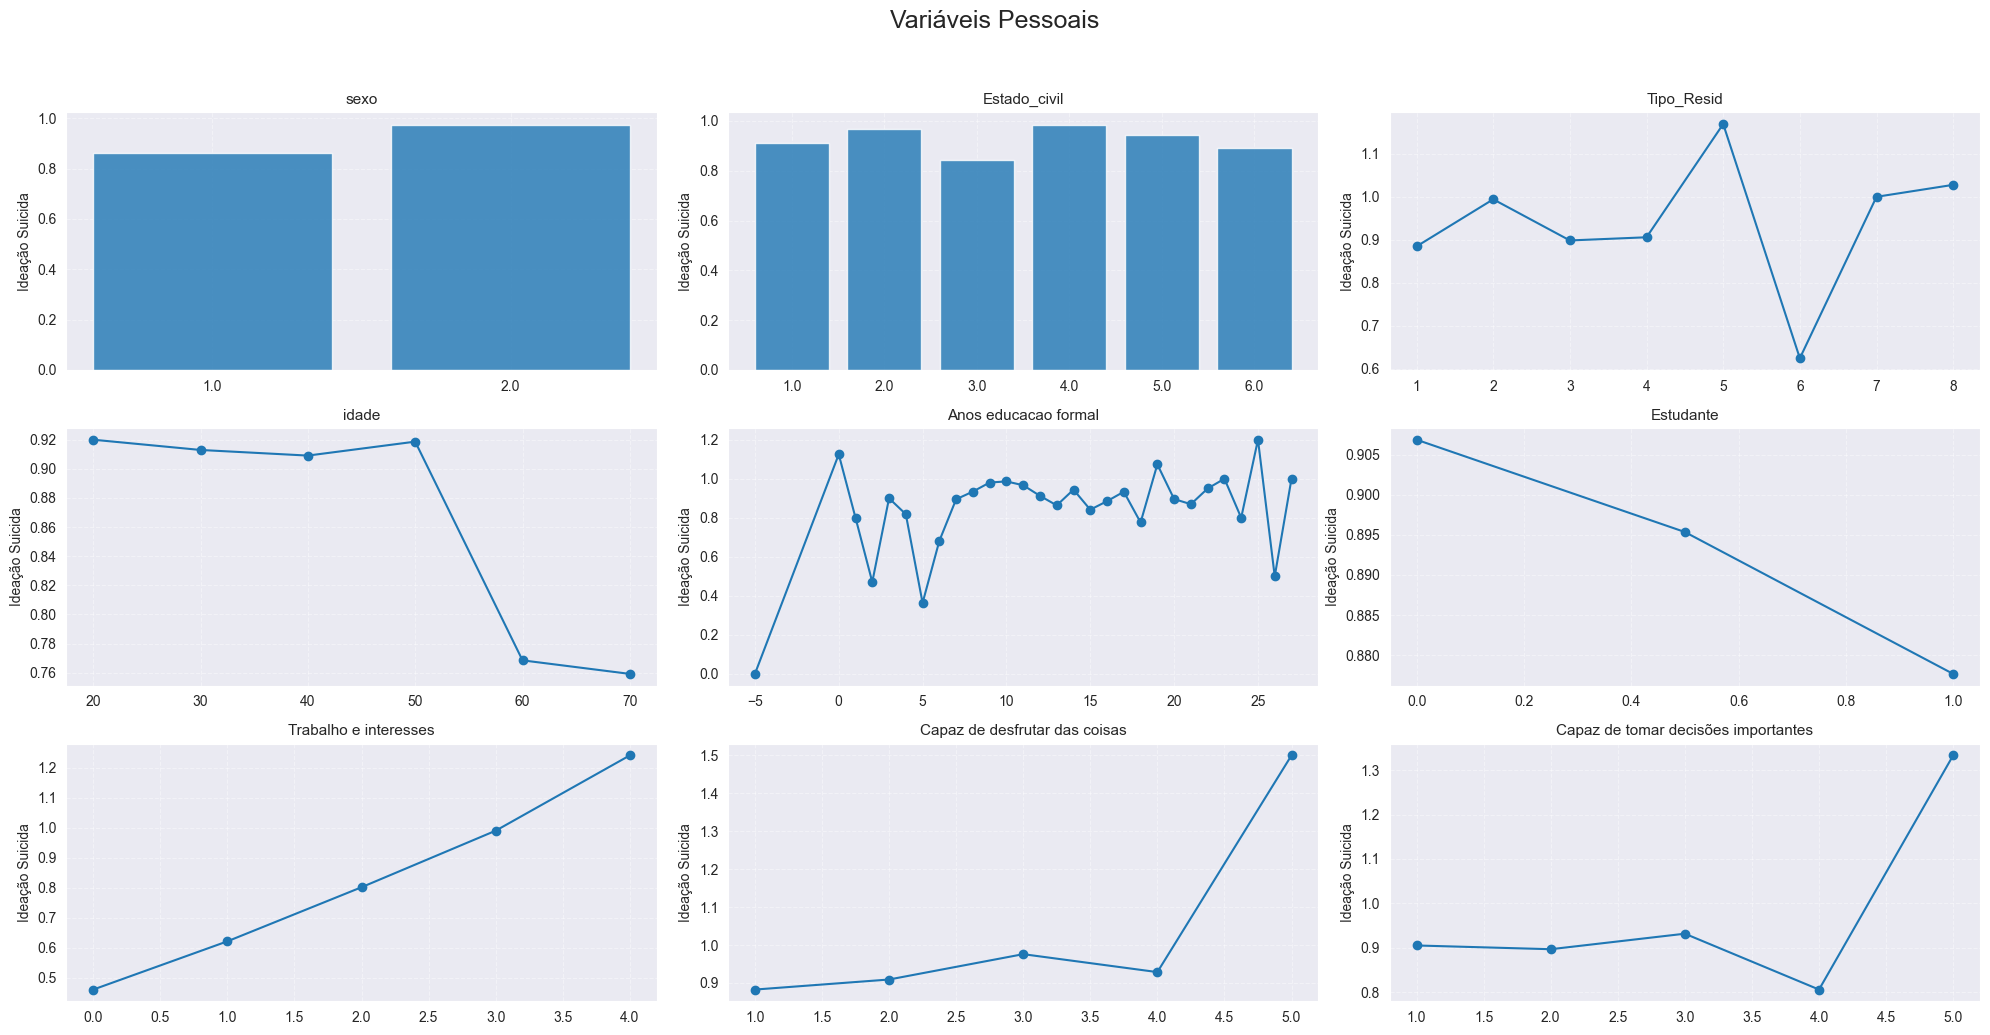

In [32]:
import matplotlib.pyplot as plt

# Define manualmente as variáveis categóricas
categorical_cols = ['sexo', 'Estado_civil']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
fig.suptitle("Variáveis Pessoais", fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for ticker, ax in zip(df_caracteristica.columns[:-2], axs.ravel()):
    df_plot = df_caracteristica.groupby(ticker).agg({'Suicidio': 'mean'}).reset_index()

    if ticker in categorical_cols:
        ax.bar(df_plot[ticker].astype(str), df_plot["Suicidio"], color='#1f77b4', alpha=0.8)
        ax.set_xticks(range(len(df_plot[ticker])))
        ax.set_xticklabels(df_plot[ticker].astype(str))
    else:
        ax.plot(df_plot[ticker], df_plot["Suicidio"], marker='o', linestyle='-', color='#1f77b4')

    ax.set_title(ticker, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Ideação Suicida", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()




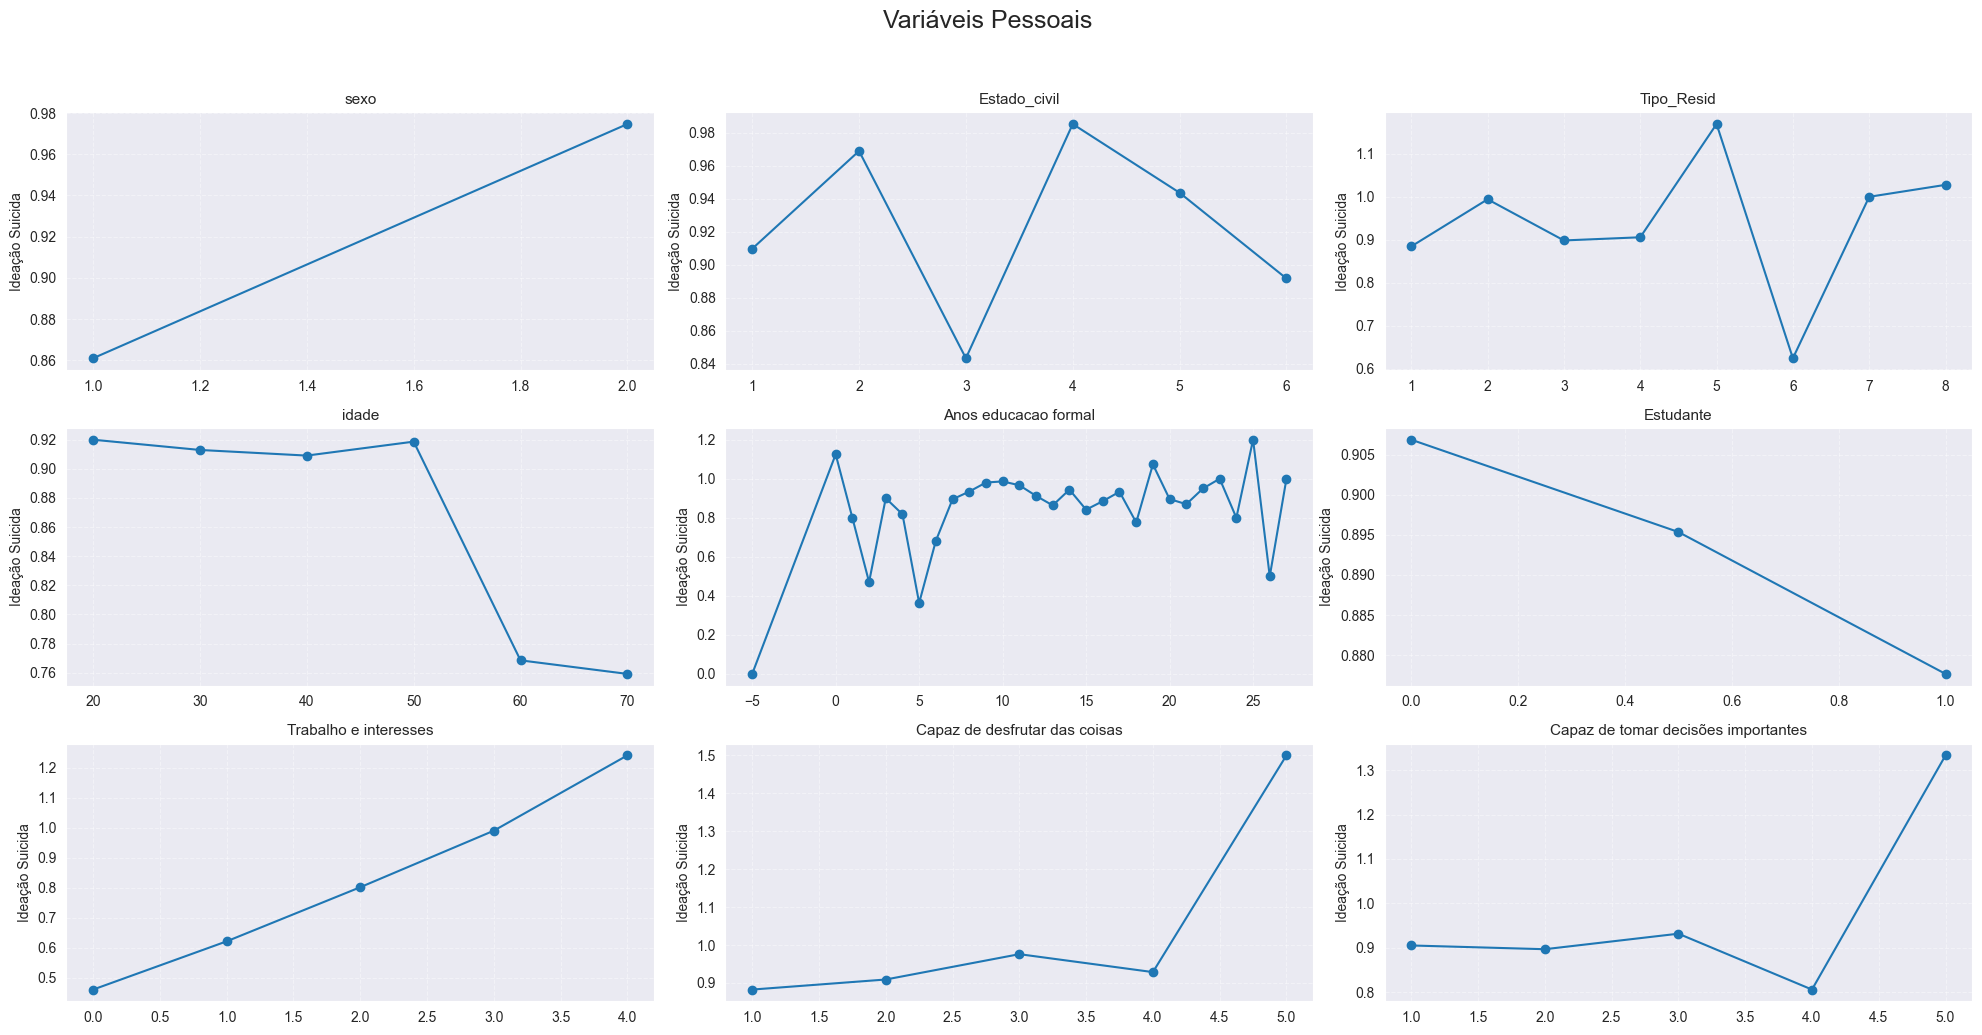

In [33]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
fig.suptitle("Variáveis Pessoais", fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for ticker, ax in zip(df_caracteristica.columns[:-2], axs.ravel()):
    # Agrupar por categoria da variável e calcular a média de ideação suicida
    df_plot = df_caracteristica.groupby(ticker).agg({'Suicidio': 'mean'}).reset_index()

    # Plotar linha
    ax.plot(df_plot[ticker], df_plot["Suicidio"], marker='o', linestyle='-', color='#1f77b4')

    # Títulos e ajustes visuais
    ax.set_title(ticker, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Ideação Suicida", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


In [34]:
df_caracteristica

,sexo,Estado_civil,Tipo_Resid,idade,Anos educacao formal,Estudante,Trabalho e interesses,Capaz de desfrutar das coisas,Capaz de tomar decisões importantes,Suicidio,Chave
0,2.0,3.0,3.0,40.0,12.0,0.0,2.0,2.0,2.0,2.0,NDAR_INVLE566FK2
1,1.0,1.0,4.0,20.0,18.0,0.0,2.0,1.0,1.0,1.0,NDAR_INVMA818VXP
2,1.0,1.0,1.0,20.0,12.0,0.0,3.0,2.0,2.0,0.0,NDAR_INVHY103MHY
3,1.0,1.0,1.0,30.0,14.0,0.0,3.0,1.0,1.0,3.0,NDAR_INVEC849VWE
4,1.0,4.0,1.0,40.0,10.0,0.0,4.0,3.0,2.0,1.0,NDAR_INVHF792VJY
...,...,...,...,...,...,...,...,...,...,...,...
3948,2.0,1.0,2.0,30.0,16.0,0.0,2.0,2.0,2.0,2.0,NDAR_INVRV044HN1
3949,1.0,5.0,1.0,50.0,10.0,0.0,2.0,1.0,1.0,1.0,NDAR_INVDE913FPZ
3950,1.0,5.0,4.0,30.0,23.0,0.5,3.0,1.0,1.0,2.0,NDAR_INVVR200LE7
3951,2.0,3.0,1.0,50.0,16.0,0.0,2.0,2.0,2.0,0.0,NDAR_INVBC964BCX


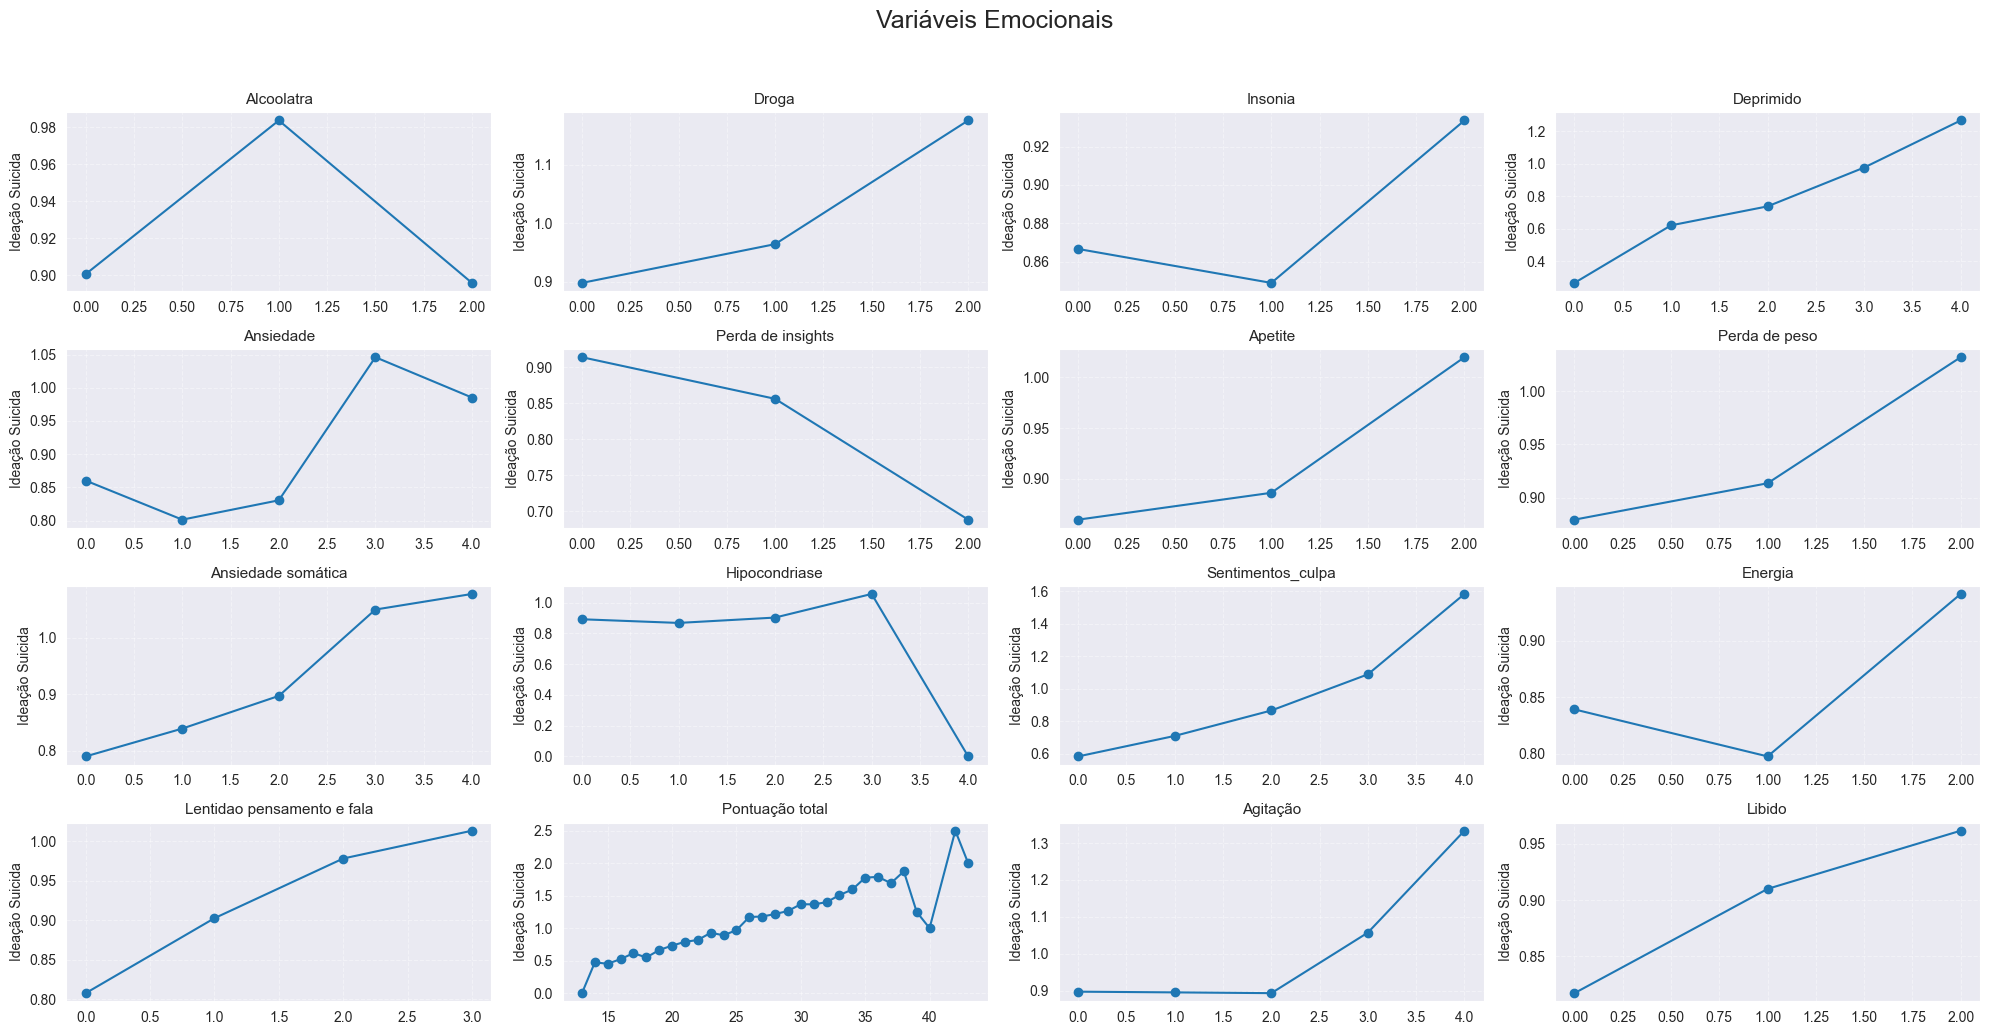

In [35]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 10))
fig.suptitle("Variáveis Emocionais", fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for ticker, ax in zip(df_emoc.columns[:-2], axs.ravel()):
    # Agrupar por categoria da variável e calcular a média de ideação suicida
    df_plot = df_emoc.groupby(ticker).agg({'Suicidio': 'mean'}).reset_index()

    # Plotar linha
    ax.plot(df_plot[ticker], df_plot["Suicidio"], marker='o', linestyle='-', color='#1f77b4')

    # Títulos e ajustes visuais
    ax.set_title(ticker, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Ideação Suicida", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

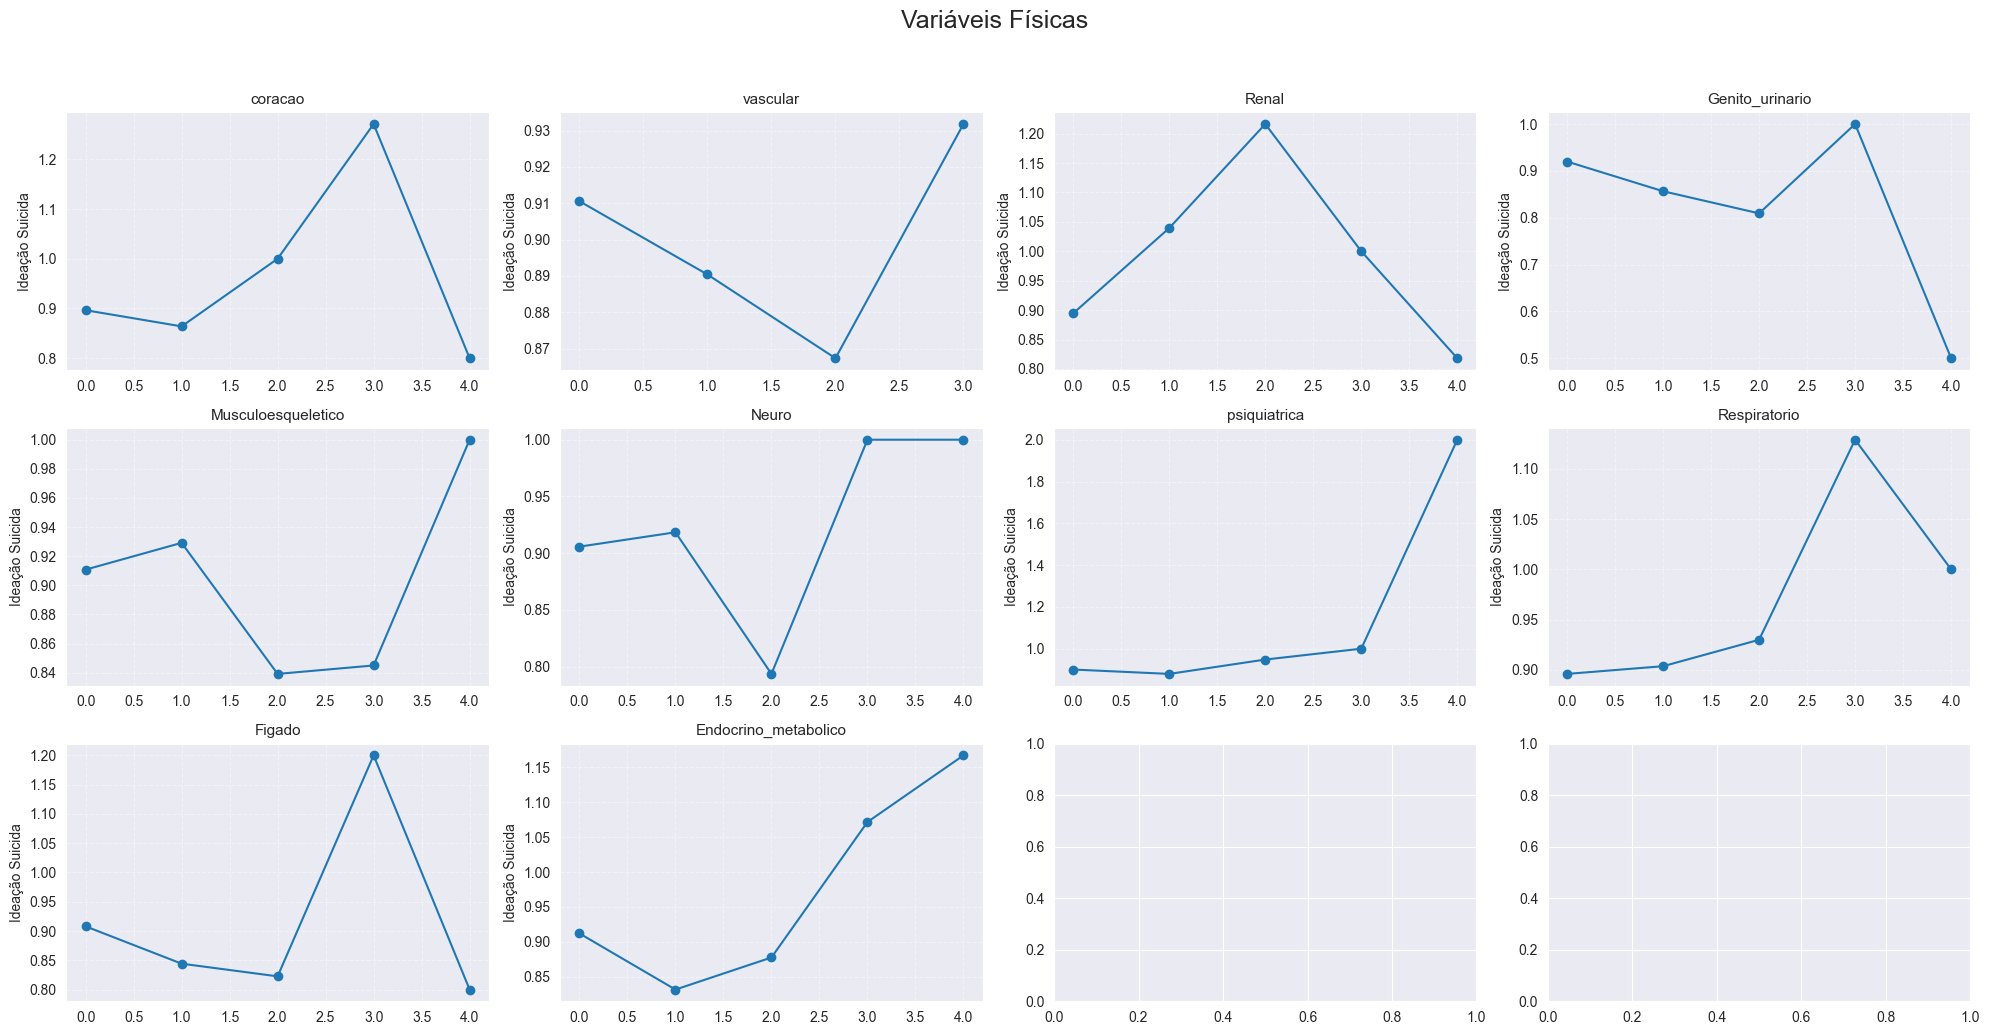

In [36]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
fig.suptitle("Variáveis Físicas", fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for ticker, ax in zip(df_fisc.columns[:-2], axs.ravel()):
    # Agrupar por categoria da variável e calcular a média de ideação suicida
    df_plot = df_fisc.groupby(ticker).agg({'Suicidio': 'mean'}).reset_index()

    # Plotar linha
    ax.plot(df_plot[ticker], df_plot["Suicidio"], marker='o', linestyle='-', color='#1f77b4')

    # Títulos e ajustes visuais
    ax.set_title(ticker, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Ideação Suicida", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

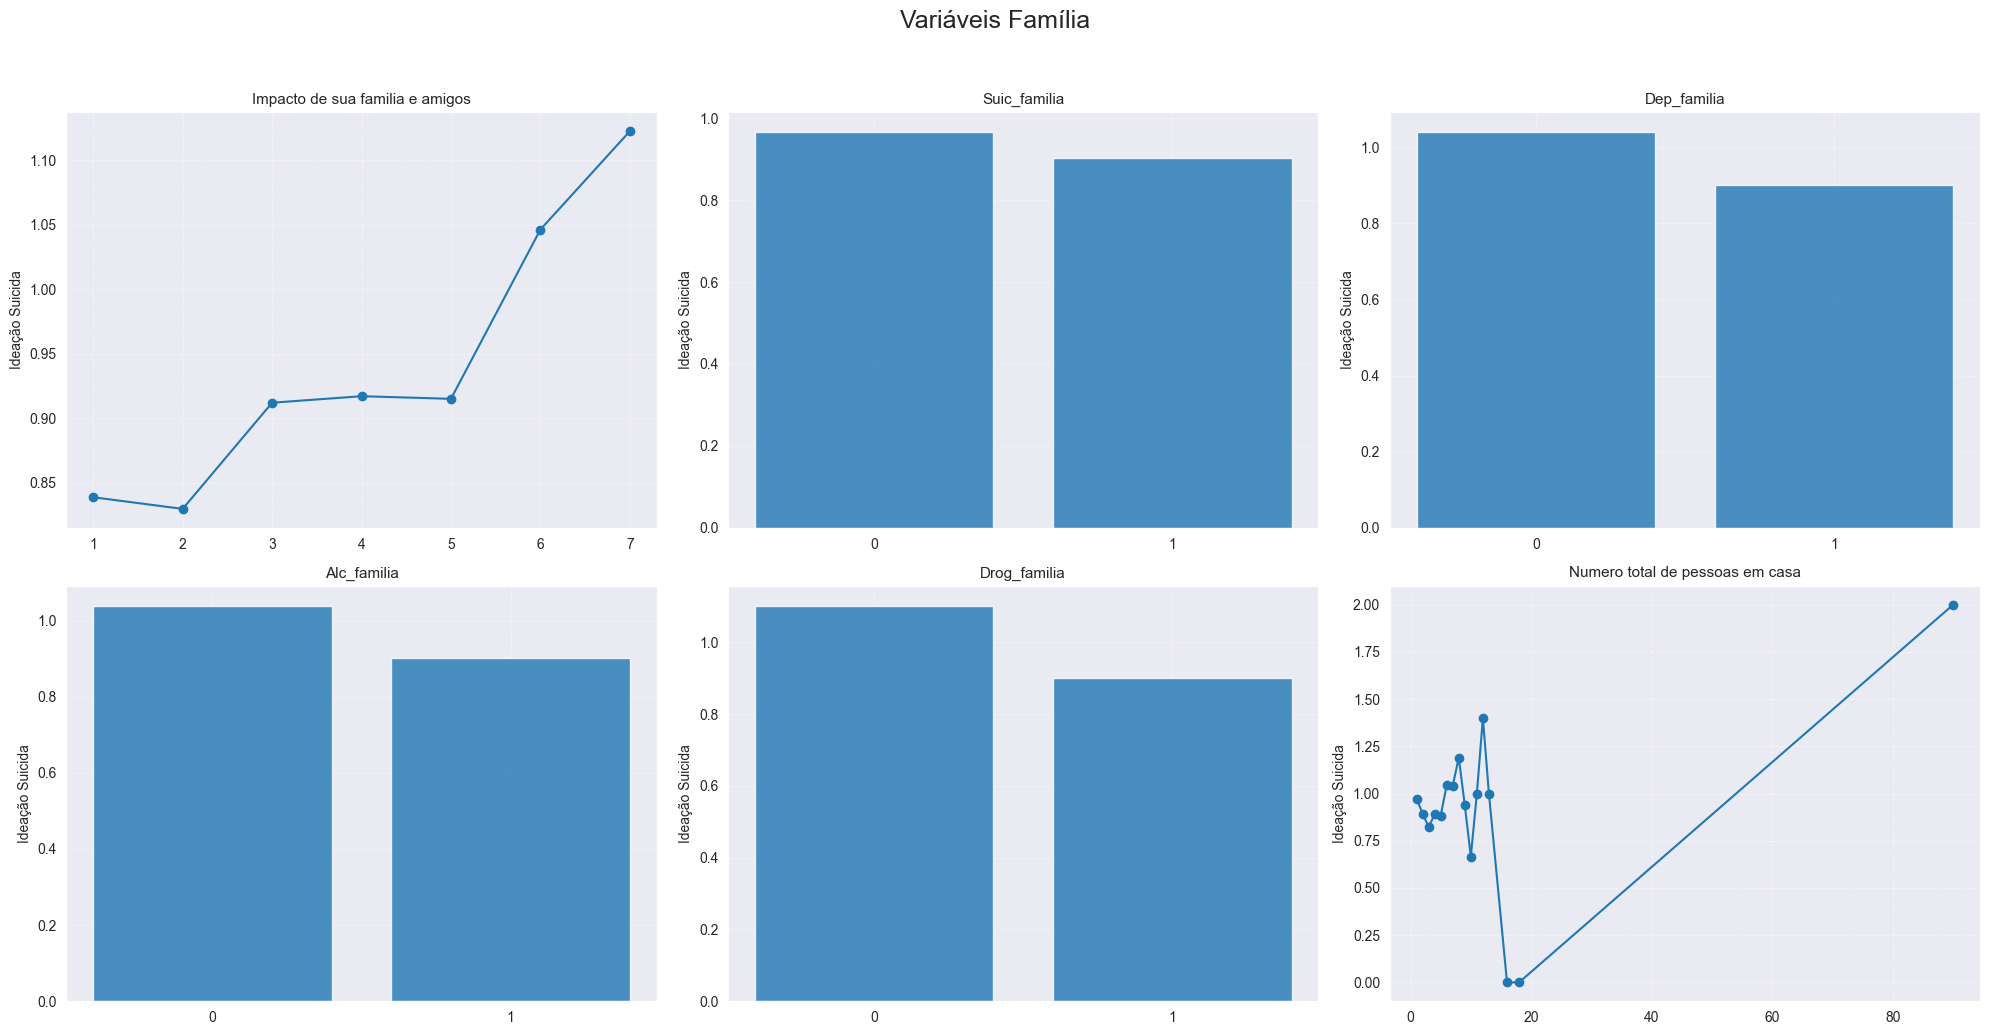

In [37]:
import matplotlib.pyplot as plt

# Lista de variáveis binárias a serem plotadas como barras
binarias = ['Suic_familia', 'Dep_familia', 'Alc_familia', 'Drog_familia']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle("Variáveis Família", fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for ticker, ax in zip(df_fam.columns[:-2], axs.ravel()):
    # Agrupar por categoria e calcular média da ideação suicida
    df_plot = df_fam.groupby(ticker).agg({'Suicidio': 'mean'}).reset_index()

    # Plotar de forma diferente dependendo do tipo da variável
    if ticker in binarias:
        ax.bar(df_plot[ticker].astype(str), df_plot["Suicidio"], color='#1f77b4', alpha=0.8)
    else:
        ax.plot(df_plot[ticker], df_plot["Suicidio"], marker='o', linestyle='-', color='#1f77b4')

    # Títulos e ajustes visuais
    ax.set_title(ticker, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Ideação Suicida", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


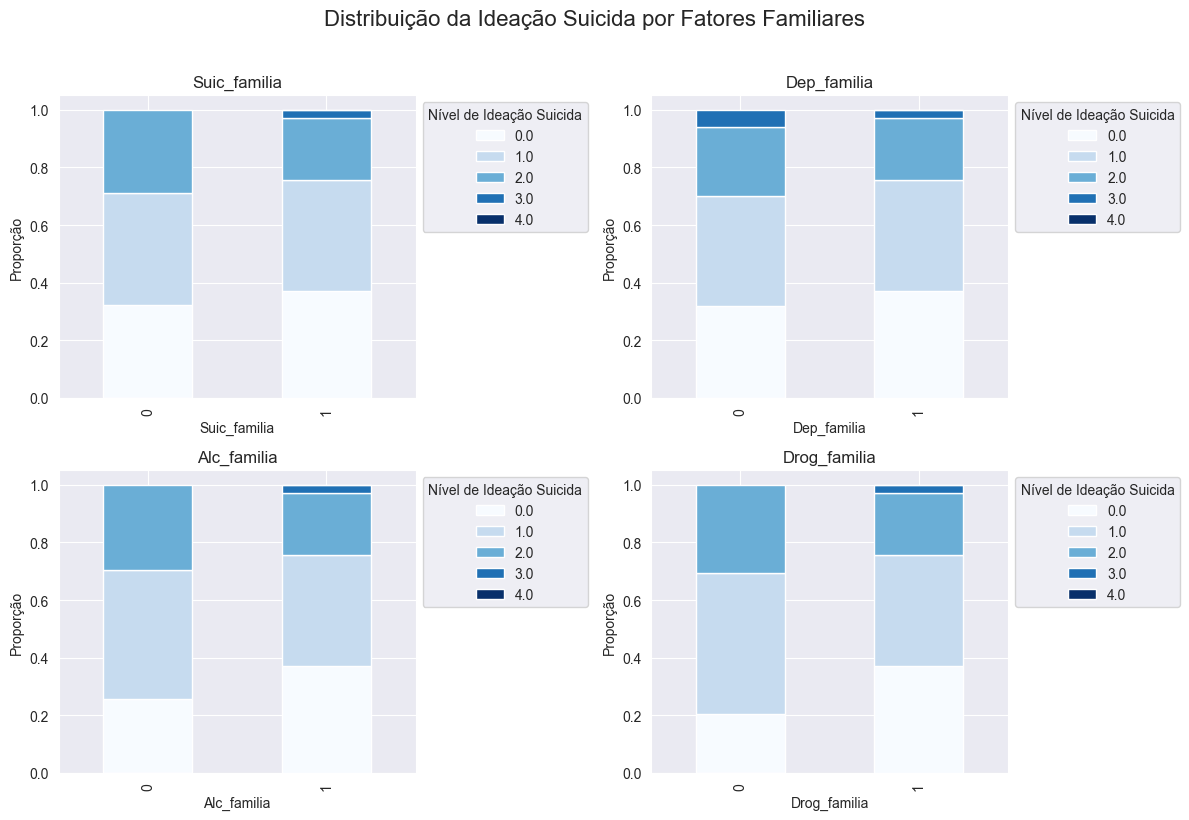

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

variaveis_binarias = ['Suic_familia', 'Dep_familia', 'Alc_familia', 'Drog_familia']

fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribuição da Ideação Suicida por Fatores Familiares", fontsize=16, y=1.02)

for var, ax in zip(variaveis_binarias, axs.ravel()):
    tab = pd.crosstab(df_fam[var], df_fam['Suicidio'], normalize='index')
    tab.plot(kind='bar', stacked=True, ax=ax, colormap='Blues')
    ax.set_title(var)
    ax.set_ylabel("Proporção")
    ax.legend(title="Nível de Ideação Suicida", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


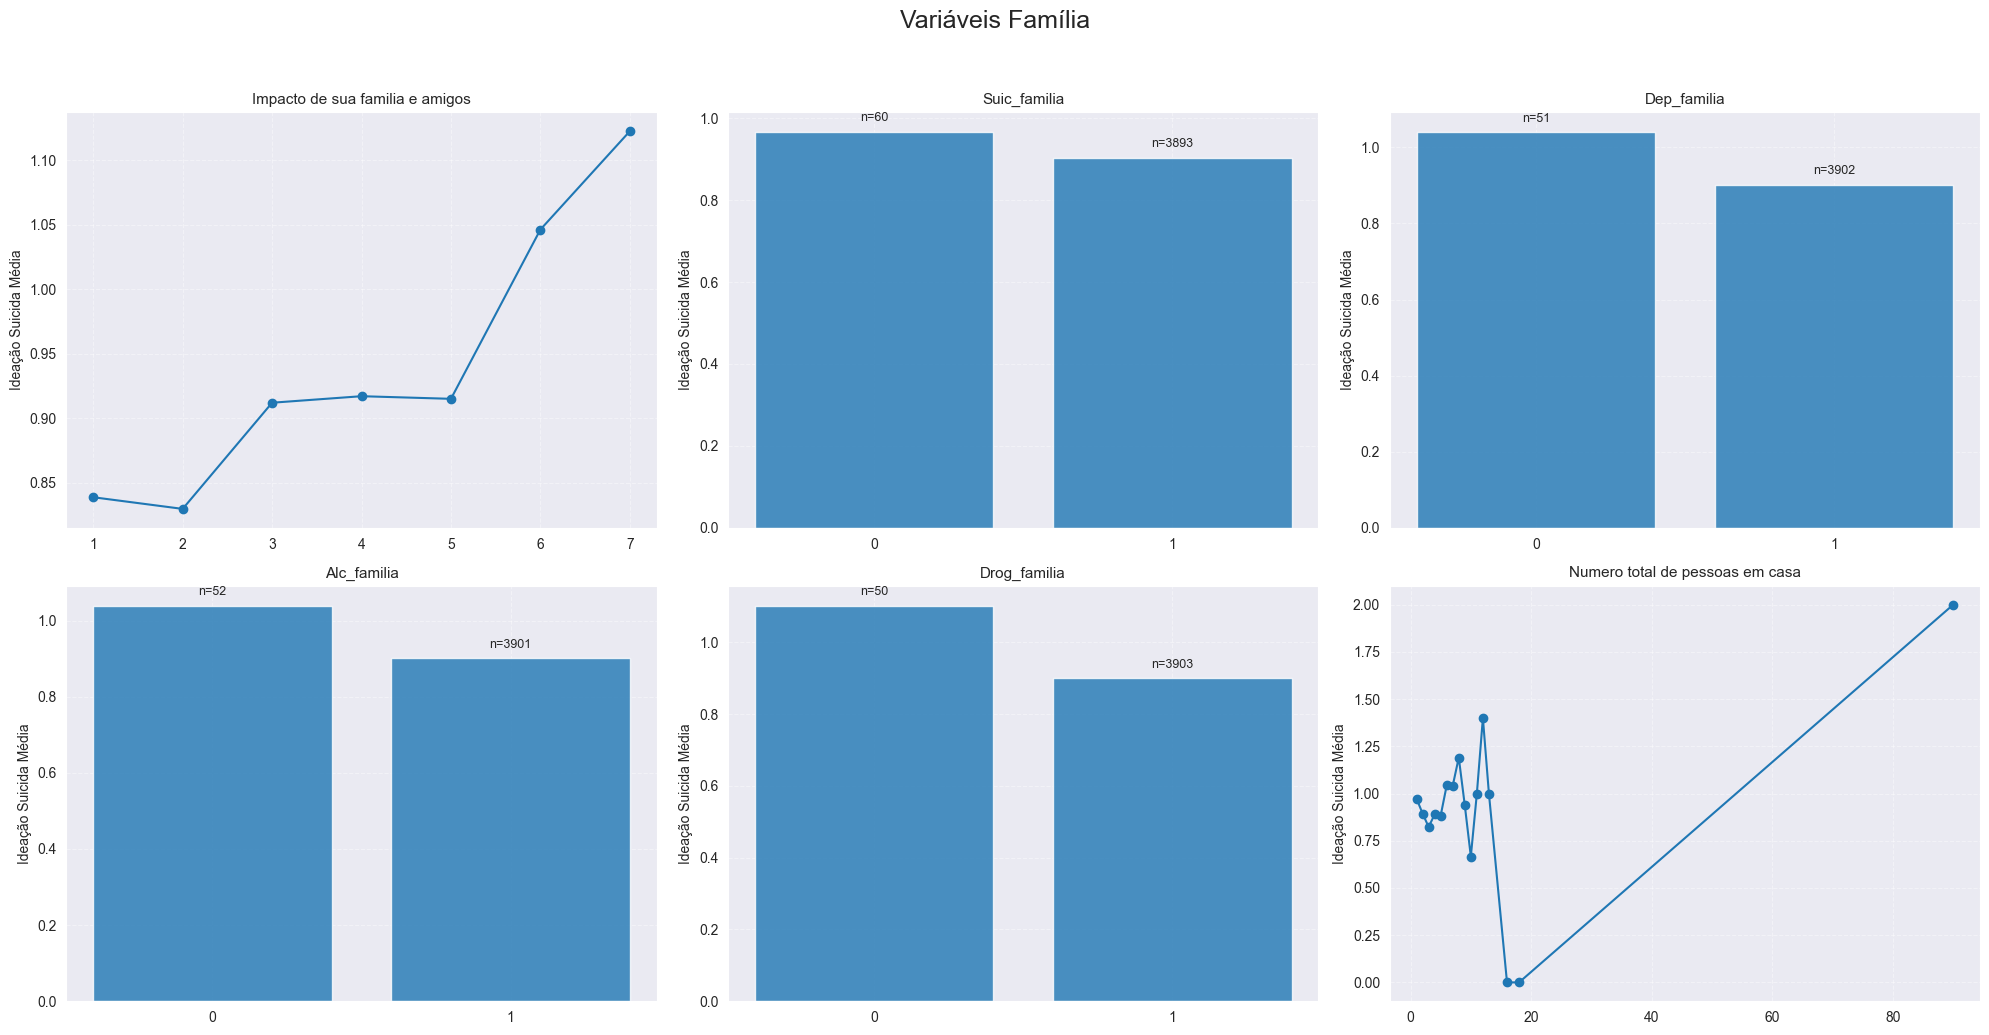

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle("Variáveis Família", fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for ticker, ax in zip(df_fam.columns[:-2], axs.ravel()):
    df_plot = df_fam.groupby(ticker).agg({'Suicidio': 'mean', 'Chave': 'count'}).reset_index()
    df_plot.rename(columns={'Chave': 'n'}, inplace=True)

    if ticker in ['Suic_familia', 'Dep_familia', 'Alc_familia', 'Drog_familia']:
        bars = ax.bar(df_plot[ticker].astype(str), df_plot["Suicidio"], color='#1f77b4', alpha=0.8)
        # Adiciona rótulo do tamanho da amostra sobre cada barra
        for bar, n in zip(bars, df_plot['n']):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                    f"n={n}", ha='center', va='bottom', fontsize=9)
    else:
        ax.plot(df_plot[ticker], df_plot["Suicidio"], marker='o', linestyle='-', color='#1f77b4')

    ax.set_title(ticker, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Ideação Suicida Média", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()



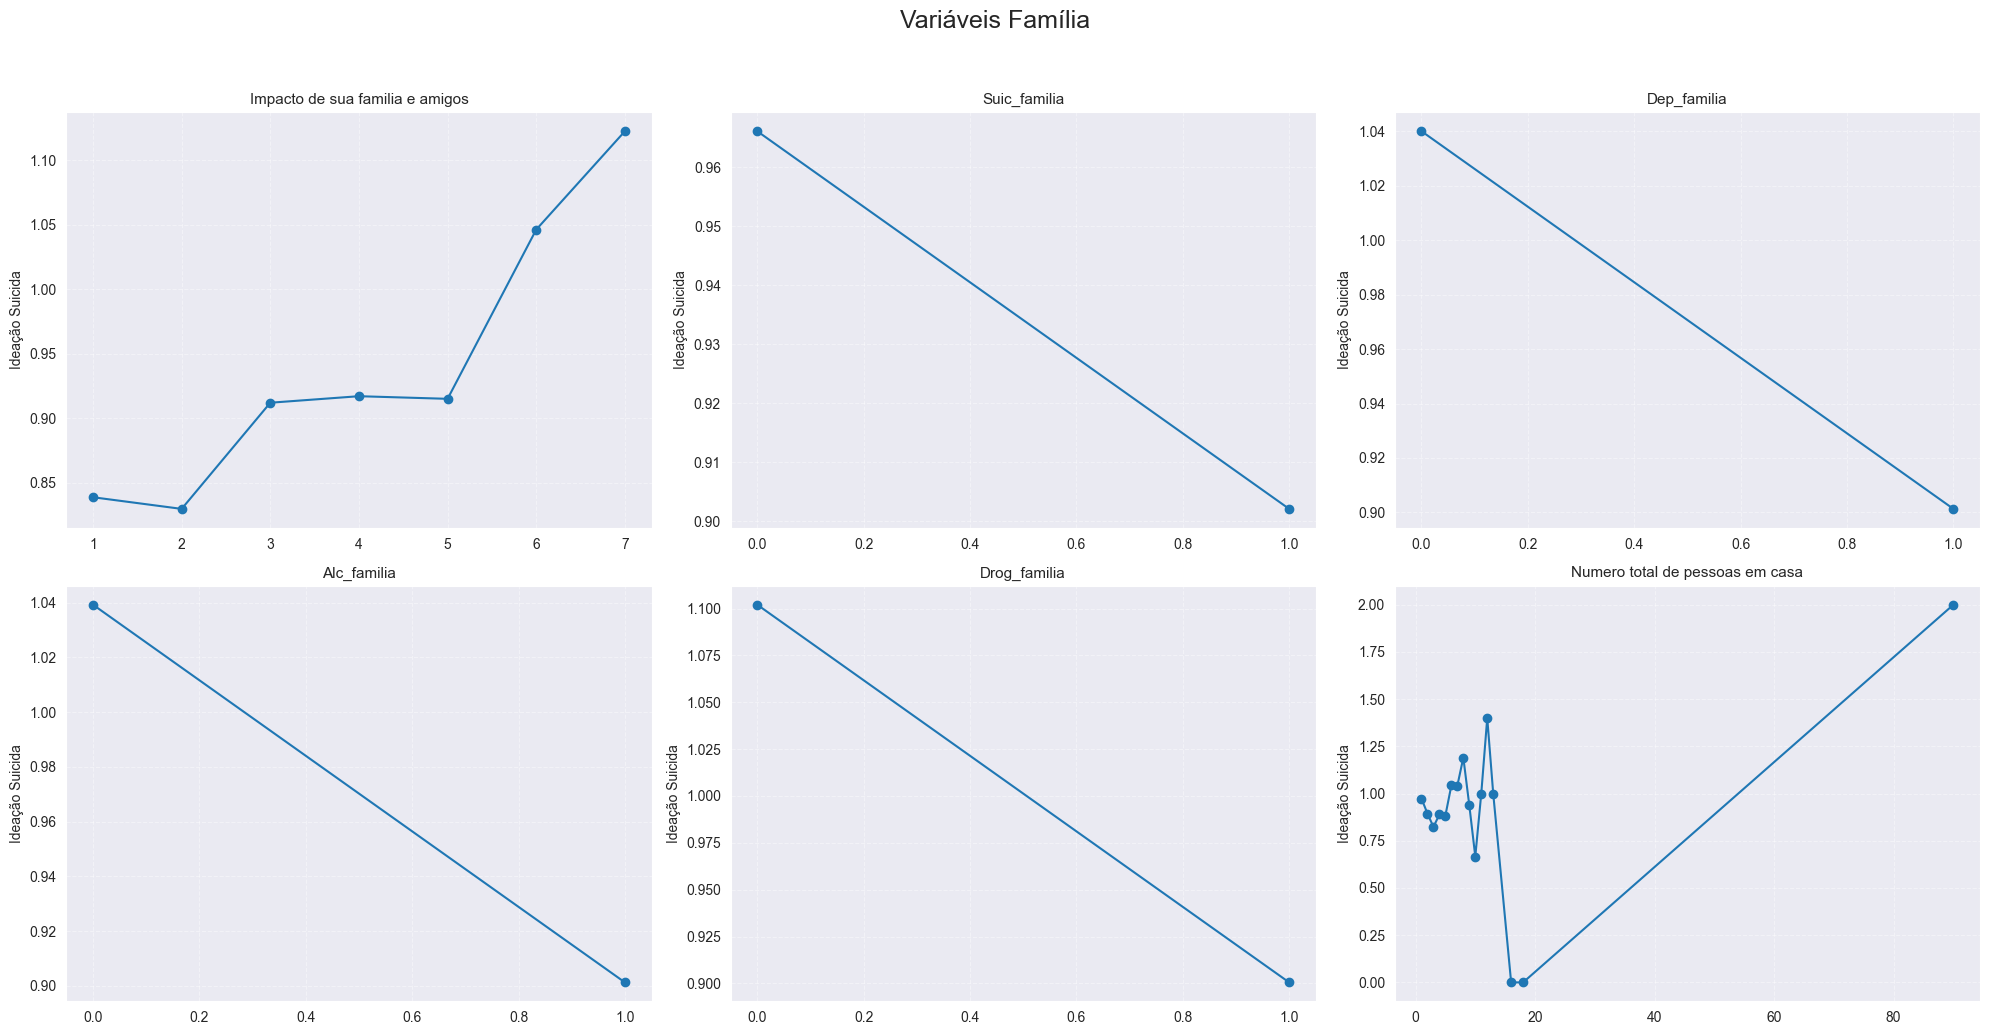

In [40]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
fig.suptitle("Variáveis Família", fontsize=18, y=1.03)
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for ticker, ax in zip(df_fam.columns[:-2], axs.ravel()):
    # Agrupar por categoria da variável e calcular a média de ideação suicida
    df_plot = df_fam.groupby(ticker).agg({'Suicidio': 'mean'}).reset_index()

    # Plotar linha
    ax.plot(df_plot[ticker], df_plot["Suicidio"], marker='o', linestyle='-', color='#1f77b4')

    # Títulos e ajustes visuais
    ax.set_title(ticker, fontsize=11)
    ax.set_xlabel("")
    ax.set_ylabel("Ideação Suicida", fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_7340\3590168440.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  se.heatmap(df_caracteristica.corr())


<Axes: >

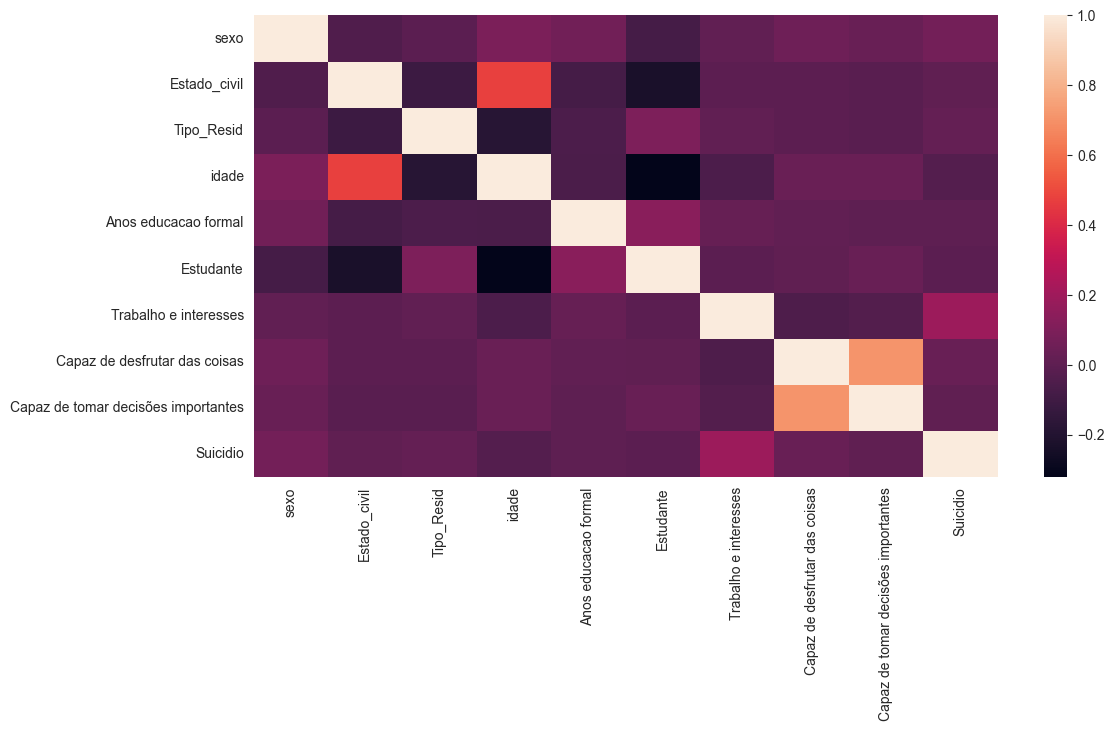

In [41]:
plt.figure(figsize=(12,6))
se.heatmap(df_caracteristica.corr())

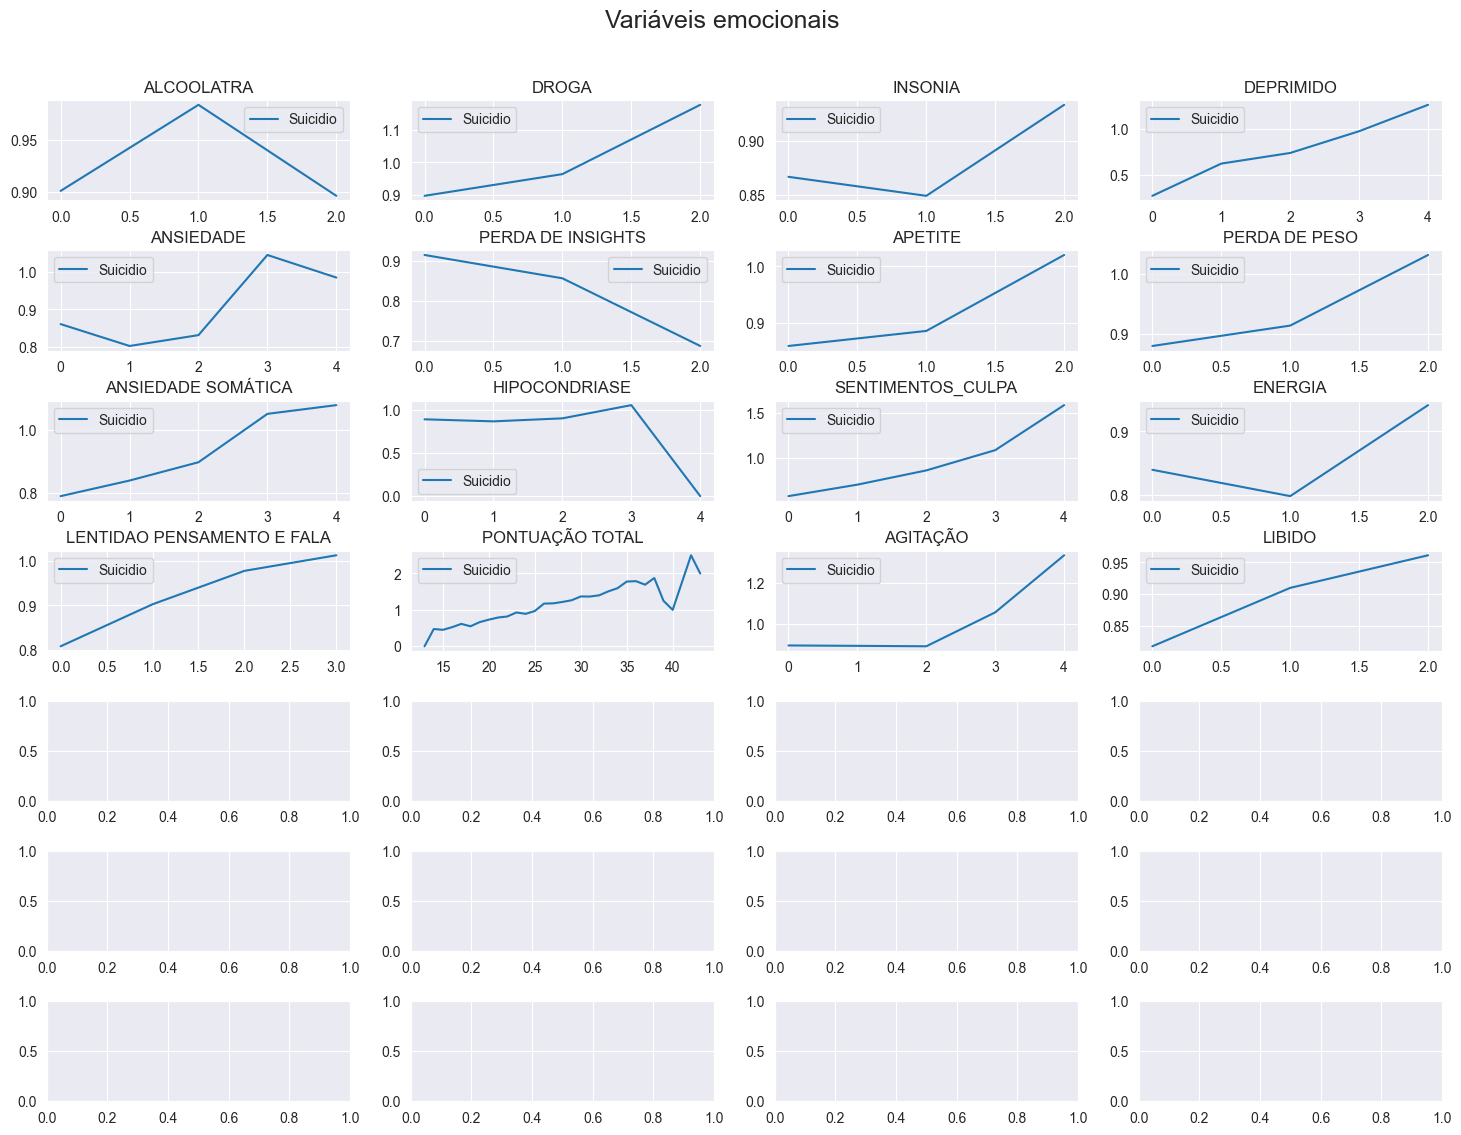

In [42]:
fig, axs = plt.subplots(nrows=7, ncols=4, figsize=(18, 13))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Variáveis emocionais", fontsize=18, y=0.95)

# loop through tickers and axes
for ticker, ax in zip(df_emoc.columns.values[:-2], axs.ravel()):
    # filter df for ticker and plot on specified axes
    #df_fisc[df_fisc[ticker] == ticker].plot(ax=ax)
    df_plot = df_emoc.groupby(ticker).agg({'Suicidio': 'mean', 'Chave': 'count'}).reset_index()
    df_plot.plot(ticker, "Suicidio",ax=ax)

    # chart formatting
    ax.set_title(ticker.upper())
    #ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_7340\812694781.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  se.heatmap(df_caracteristica.corr())


<Axes: >

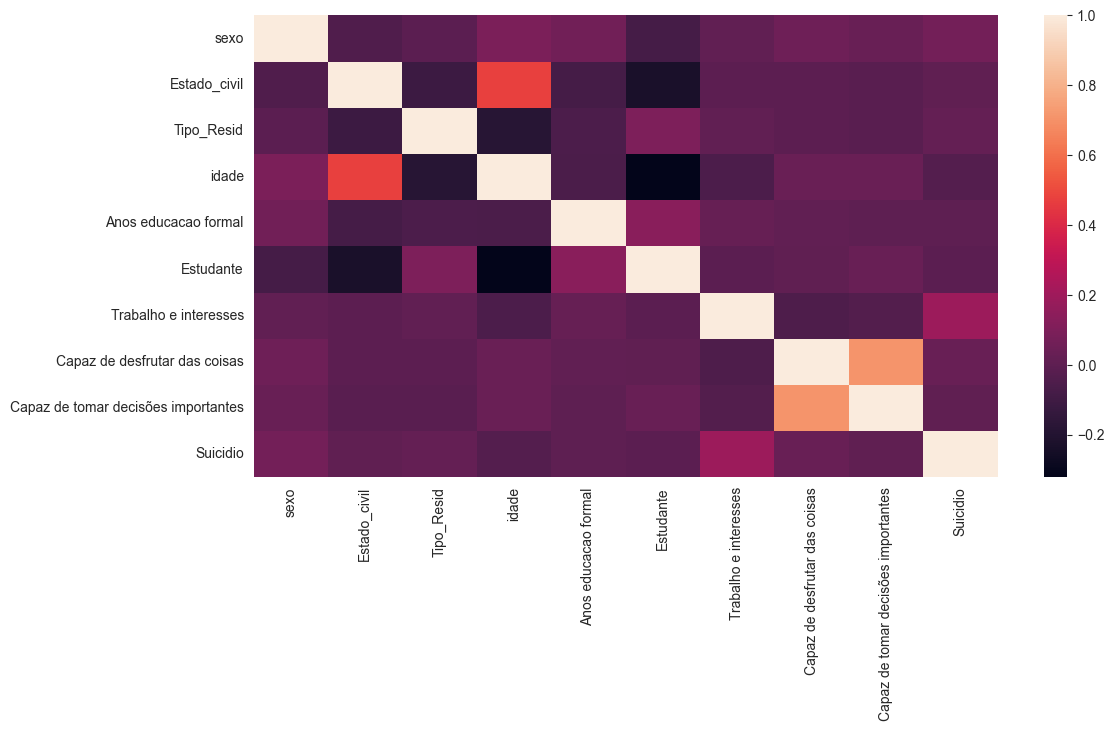

In [43]:
#Características
plt.figure(figsize=(12,6))
se.heatmap(df_caracteristica.corr())

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_7340\1314776923.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  se.heatmap(df_emoc.corr())


<Axes: >

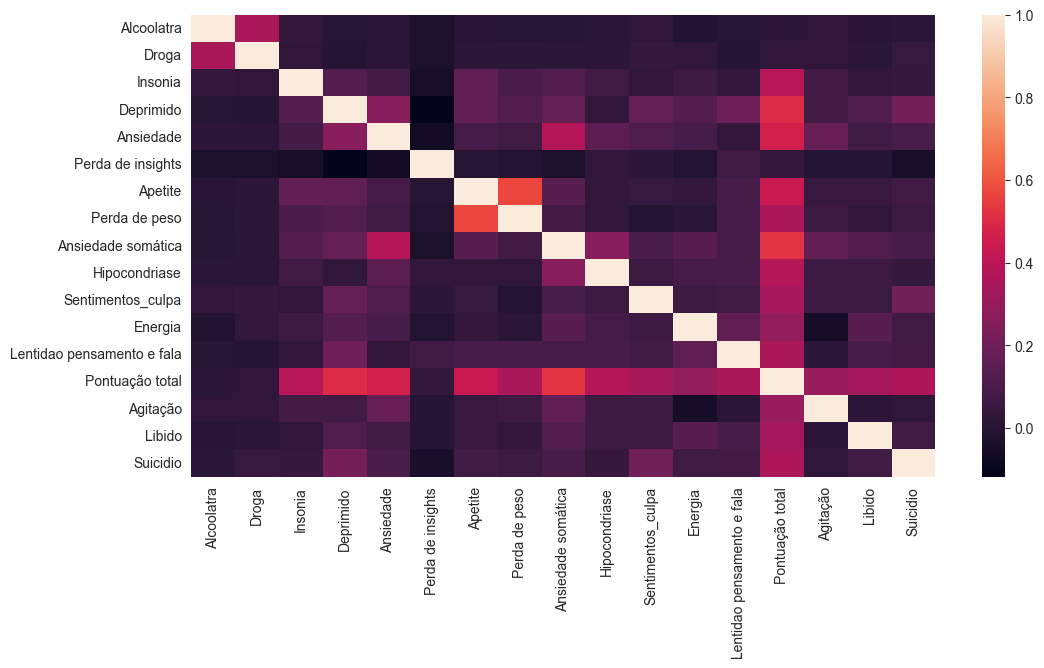

In [44]:
# Emocional
plt.figure(figsize=(12,6))
se.heatmap(df_emoc.corr())

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_7340\1455813474.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  se.heatmap(df_fam.corr())


<Axes: >

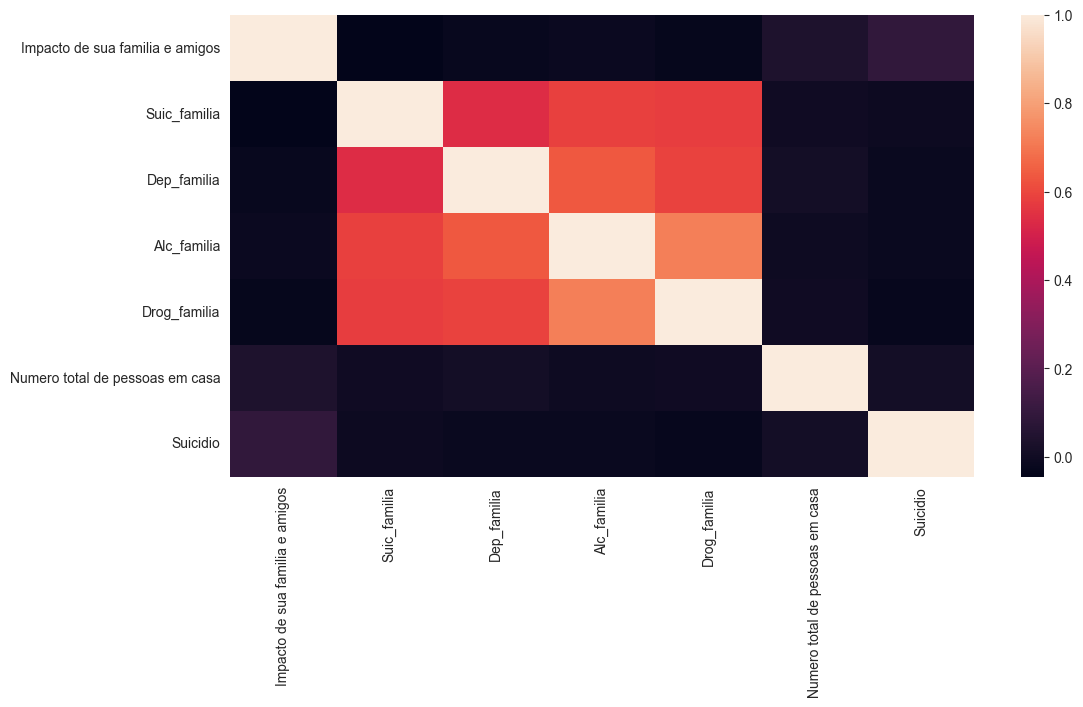

In [45]:
#Família
plt.figure(figsize=(12,6))
se.heatmap(df_fam.corr())

C:\Users\Cristiane\AppData\Local\Temp\ipykernel_7340\1078150941.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  se.heatmap(df_fisc.corr())


<Axes: >

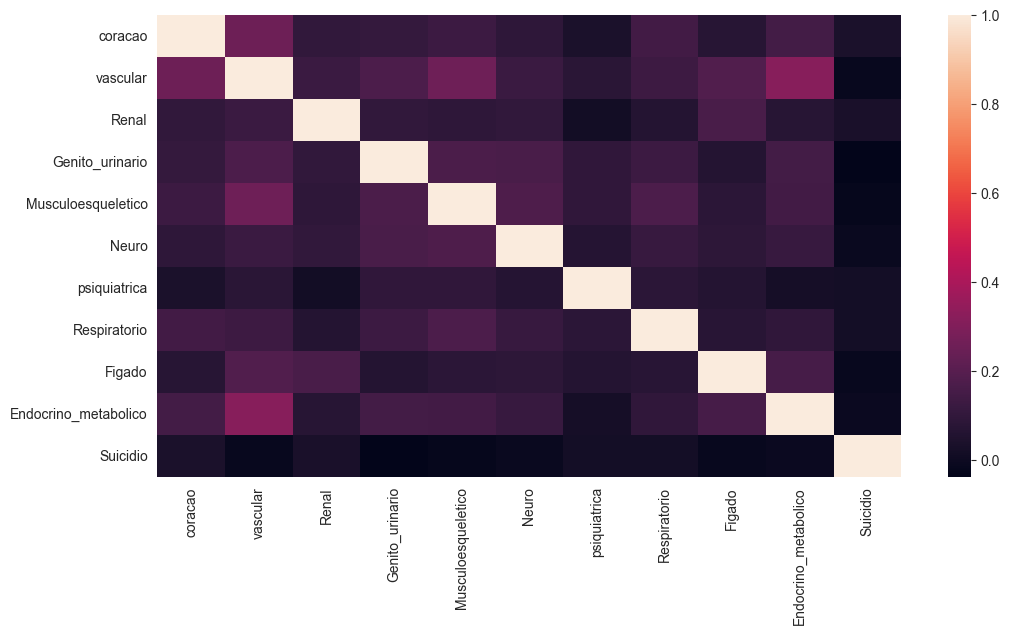

In [46]:
# Doenças físicas
plt.figure(figsize=(12,6))
se.heatmap(df_fisc.corr())

## Análise por Target Ansiedade

In [47]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Ansiedade' & Coluna2 != 'Target_Ansiedade'").head(20)

,Coluna1,Coluna2,correlation


In [48]:
print('Ansiedade média: {:.1%}'.format(df['Target_Ansiedade'].mean()))
df_plot = df.groupby('Pontuação total').agg({'Target_Ansiedade': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Pontuação total', 'Target_Ansiedade', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Pontuação total', y='Target_Ansiedade')) +
    pn.geom_point(pn.aes(size='Chave')) +
    #pn.geom_text(pn.aes(label='Chave'), nudge_y=0.01) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

KeyError: 'Target_Ansiedade'

In [ ]:
print('Ansiedade média: {:.1%}'.format(df['Target_Ansiedade'].mean()))
df_plot = df.groupby('Hipocondriase').agg({'Target_Ansiedade': 'mean',
                                             'Chave': 'count'}).reset_index()
df_plot.columns = ['Hipocondriase', 'Target_Ansiedade', 'Chave']
print(df_plot)
p = (
    pn.ggplot(df_plot, pn.aes(x='Hipocondriase', y='Target_Ansiedade')) +
    pn.geom_point(pn.aes(size='Chave')) +
    pn.geom_text(pn.aes(label='Chave'), nudge_y=0.04) +
    pn.scale_y_continuous(labels=lambda l: ["%d%%" % (v * 100) for v in l]) +
    pn.theme(axis_text_x=pn.element_text(rotation=30, hjust=1))
    )
print(p)

## Análise Tárget TOC

In [ ]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_TOC' & Coluna2 != 'Target_TOC'").head(20)

## Análise Tárget Insônia

In [ ]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Insonia' & Coluna2 != 'Target_Insonia'").head(20)

## Análise Tárget Hipocondriase

In [ ]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Hipocondriase' & Coluna2 != 'Target_Hipocondriase'").head(20)

## Análise Tárget Drogas

In [ ]:
# 20 features mais relevantes
df_corr.query("Coluna1 == 'Target_Drogas' & Coluna2 != 'Target_Drogas'").head(20)